# title
## By Svajune Klimasauskaite

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt     

%matplotlib inline

## Gather Data



In [2]:
#Load citizens
citizen=pd.read_csv("https://raw.githubusercontent.com/vilnius/gyventojai/master/registered_people_n_streets.csv")
citizen.head(2)

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,SENIUNNR,TER_REJ_KODAS,GATV_K,GAT_ID
0,1966,LTU,M,NaN,0,Šnipiškės,Kalvarijų g.,3.0,G1,216.0,22068.0
1,2010,LTU,M,NaN,0,Pašilaičiai,Gabijos g.,7.0,G1,125.0,21981.0


In [18]:
#Load real estate
re=pd.read_csv("https://raw.githubusercontent.com/vilnius/nekilnojamas-turtas/master/NT_sklypai.csv", sep=';')
re.sample(10)

,OBJID,PASKIRTIS,JURIDPLOT,VIETOVE,GATVE,SERVITUTAI,CN94,CE94,IRASODATA,GRAFPLOT,GRAFDATA,GRAFDKOR,K_SIST,GEODEZMAT,BUDAS,Shape_Length,Shape_Area
20030,"1,0101E+12",Žemės ūkio,"0,0599",Vilnius,Žirgo Sodų 2-oji g.,NaN,"6065522,892","586079,645",2018-09-25,598,2010-12-16,NaN,KS94,Geodeziškai atmatuotas,Mėgėjų sodo žemės sklypai,"99,89636505","598,4808"
50366,422549,Kita (žemės),"0,04",Vilnius,Paribio g.,NaN,"6063745,341","580648,798",2014-03-27,400,2004-11-11,NaN,S440,Geodeziškai atmatuotas,Gyvenamosios teritorijos (Mažaaukščių gyvenamų...,"90,2345495","399,8182205"
60279,22404794,Kita (žemės),"0,1716",Plytinė,NaN,"1) Servitutas - teisė tiesti, aptarnauti, naud...",6065898,575022,2018-08-02,1716,2017-12-11,NaN,KS94,Geodeziškai atmatuotas,Susisiekimo ir inžinerinių tinklų koridorių te...,"297,1746688","1715,98735"
459,21540277,Kita (žemės),"0,1014",Vilnius,Fausto Kiršos g.,NaN,"6053385,404","584031,045",2014-09-16,1014,2014-09-16,NaN,KS94,Geodeziškai atmatuotas,Vienbučių ir dvibučių gyvenamųjų pastatų terit...,"131,1176999","1014,0056"
44003,22284955,Kita (žemės),"0,0987",Vilnius,Varnalaukio g.,"1) Servitutas - teisė tiesti, aptarnauti, naud...",6068102,576587,2017-02-27,987,2017-02-27,NaN,KS94,Geodeziškai atmatuotas,Vienbučių ir dvibučių gyvenamųjų pastatų terit...,"133,3071449","986,95615"
4241,22250526,Kita (žemės),"0,4384",Vilnius,Rygos g.,"1) Servitutas - teisė tiesti, aptarnauti požem...",6065427,578131,2017-07-26,4384,2016-11-21,NaN,KS94,Geodeziškai atmatuotas,Komercinės paskirties objektų teritorijos,"340,1230409","4384,0314"
26811,20216892,Kita (žemės),"3,4051",Vilnius,Parko g.,NaN,"6061826,664","592327,085",2014-03-27,34037,2007-10-11,NaN,S440,Geodeziškai atmatuotas,Visuomeninės paskirties teritorijos,"818,9478207","34037,25378"
883,"1,0101E+12",Kita (žemės),"0,0504",Vilnius,Žiemos g.,NaN,"6062186,542","585335,357",2014-03-27,504,1997-04-08,NaN,S440,Geodeziškai atmatuotas,Gyvenamosios teritorijos (Mažaaukščių gyvenamų...,"97,7548363","503,60324"
64473,20741654,Kita (žemės),"0,0943",Vilnius,Šumsko g.,1) Kelio servitutas - teisė važiuoti transport...,6054683,578834,2018-08-06,943,2018-08-06,NaN,KS94,Geodeziškai atmatuotas,Komercinės paskirties objektų teritorijos,"123,0471861","943,2655"
2179,"1,0101E+12",Žemės ūkio,"0,0614",Vilnius,Eglinės Sodų g.,NaN,"6064097,063","593017,215",2014-03-28,614,2011-12-16,NaN,KS94,Geodeziškai atmatuotas,Mėgėjų sodo žemės sklypai,"107,0001694","614,1714069"


In [4]:
#Load real estet owners
re_owner=pd.read_csv("https://raw.githubusercontent.com/vilnius/nekilnojamas-turtas/master/NT_sklypai_nuosavybe.csv", sep=';')
re_owner.head(2)

,OBJ_ID,TEI_ID,SAVININKAS,NAUDTEISE,DALIS
0,24950,27469182,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
1,24993,21019357,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"


In [5]:
#Load flats
flat=pd.read_csv("https://raw.githubusercontent.com/vilnius/apartment-buildings/master/apartment_buildings_2019.csv", sep=';')
flat.head(2)

,id,adresas,namo_valdytojas,valdymo_forma,paskyrimo_pagrindas,administratoriaus_pabaigos_Data,paskirtis,uni_nr,bendr_plotas,naud_plotas,build_year,renov_metai,renovacijos_statusas,energ_naudingumo_klase,butu_skaicius,negyvenamuju_palapu_skaicius,korpusas,sklypo_plotas
0,1,A. Goštauto g. 2,286-oji gyvenamojo namo A.Goštauto g. 2/15 sav...,Bendrija,1995.02.02,NaN,Gyvenamoji (trys ir daugiau butų),1096-0010-4010,6607.43,4360.68,1960.0,NaN,Nerenovuotas,NaN,53.0,4.0,1A7p,0.00
1,2,A. Goštauto g. 3,DNSB NERIES VINGIS,Bendrija,2009.04.10,NaN,Gyvenamoji (trys ir daugiau butų),1095-7003-6016,4304.17,2771.57,1957.0,NaN,Nerenovuotas,NaN,38.0,14.0,1A5p,0.15


## Assess Citizens

In [6]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72163 entries, 0 to 72162
Data columns (total 17 columns):
OBJID           72163 non-null object
PASKIRTIS       72163 non-null object
JURIDPLOT       72163 non-null object
VIETOVE         72148 non-null object
GATVE           61742 non-null object
SERVITUTAI      10200 non-null object
CN94            72163 non-null object
CE94            72163 non-null object
IRASODATA       72163 non-null object
GRAFPLOT        72163 non-null int64
GRAFDATA        72163 non-null object
GRAFDKOR        19949 non-null object
K_SIST          72163 non-null object
GEODEZMAT       72163 non-null object
BUDAS           68539 non-null object
Shape_Length    72163 non-null object
Shape_Area      72163 non-null object
dtypes: int64(1), object(16)
memory usage: 9.4+ MB


In [7]:
re.isnull().sum()

OBJID               0
PASKIRTIS           0
JURIDPLOT           0
VIETOVE            15
GATVE           10421
SERVITUTAI      61963
CN94                0
CE94                0
IRASODATA           0
GRAFPLOT            0
GRAFDATA            0
GRAFDKOR        52214
K_SIST              0
GEODEZMAT           0
BUDAS            3624
Shape_Length        0
Shape_Area          0
dtype: int64

In [8]:
re.nunique()

OBJID           31578
PASKIRTIS           5
JURIDPLOT        8357
VIETOVE            81
GATVE            2569
SERVITUTAI       9835
CN94            67003
CE94            66572
IRASODATA        2632
GRAFPLOT         8812
GRAFDATA         5305
GRAFDKOR         3521
K_SIST              5
GEODEZMAT           3
BUDAS             197
Shape_Length    71861
Shape_Area      71769
dtype: int64

In [9]:
re.PASKIRTIS.unique()

array(['Žemės ūkio', 'Kita (žemės)', 'Miškų ūkio',
       'Laisvos valst. žemės fondo', 'Konservacinė'], dtype=object)

In [10]:
re.VIETOVE.unique()

array(['Platiniškės', 'Vilnius', 'Kriaučiūnai', 'Vaidotai', 'Dobrovolė',
       'Grigiškės', 'Basiukai', 'Salos', 'Trakų Vokė', 'Mažieji Gulbinai',
       'Mačiuliškės', 'Daniliškės', 'Rokantiškės', 'Bališkės',
       'Buivydiškės', 'Nemėžis', 'Gineitiškės', 'Guobos', 'Pagiriai',
       'Vaidegiai', 'Plytinė', 'Keturiasdešimt Totor', 'Didieji Pupojai',
       'Vilniaus m. sav. ter', 'Kryžiokai', 'Naujoji', 'Kuprioniškės',
       'Pupinė', 'Bajorai', 'Pavilionys', 'Padekaniškės', 'Gureliai',
       'Didieji Gulbinai', 'Ližiškės', 'Naujaneriai', 'Galgiai',
       'Vanaginė', 'Vilkeliškės', 'Grigaičiai', 'Lydos Kelias',
       'Naujakiemis', 'Dievoniškės', 'Kazbėjai', 'Kuzmiškės', 'Užukampis',
       'Kulokiškės', 'Baraškos', 'Neravai', 'Ąžuolijai', 'Smalinė',
       'Tarandė', 'Zujūnai', 'Metropolis', 'Gilužiai', 'Gudeliai',
       'Upytė', 'Mickūnai', 'Rudaminos Kelias', 'Juodasis Kelias',
       'Pagubė', nan, 'Kadriškės', 'Račkūnai', 'Varnė', 'Pakalniškės',
       'Pašilaičiai', 'Saka

In [11]:
re.K_SIST.unique()

array(['KS94', 'S440', 'SAL', 'KS42', 'KS63'], dtype=object)

In [12]:
re.GEODEZMAT.unique()

array(['Geodeziškai atmatuotas', 'Preliminariai atmatuotas',
       'Nepaženklintas'], dtype=object)

In [13]:
print('Viso sklypu Vilniaus teritorijoje - {}'.format(re[re['VIETOVE'] != 'Vilnius']['OBJID'].count()))
      

Viso sklypu Vilniaus teritorijoje - 8330


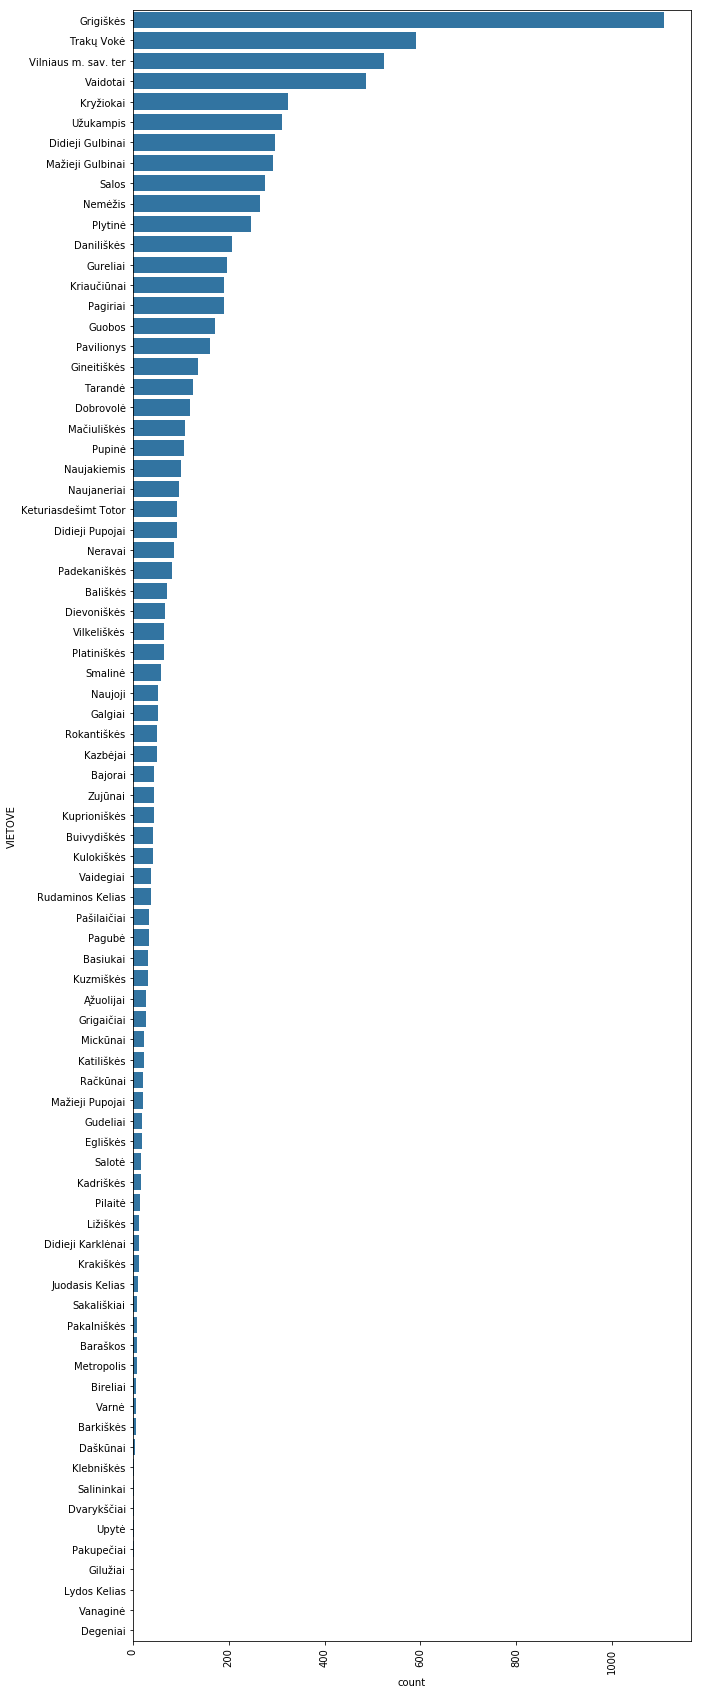

In [14]:
plt.figure(figsize = [10, 30]) 
base_color=sb.color_palette()[0]
re2=re[re['VIETOVE'] != 'Vilnius']
order_rule=re2['VIETOVE'].value_counts().index
sb.countplot(data=re2, y='VIETOVE',color=base_color, order=order_rule);
plt.xticks(rotation=90);

In [25]:
re['Year'] = pd.to_datetime(re['IRASODATA']).astype(str)
re['Year'] = re['Year'].str.split("-").str[0].astype(int)
